In [2]:
cd /content/drive/MyDrive/IC-PBL/API

/content/drive/MyDrive/IC-PBL/API


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.text import Tokenizer 
import pandas as pd
import glob

files0 = glob.glob("0/*.txt")
files1 = glob.glob("1/*.txt")
df = pd.DataFrame(columns = ['label', 'file'])
number0 = 0
number1 = 0

for file in files0:
    with open(file, 'r') as f:
        line = f.read().replace('\n',' ')
        number0 += 1
        result = [(0,line)]
        dfnew = pd.DataFrame(result, columns = ['label', 'file'])
        df = df.append(dfnew, ignore_index = True)
        

for file in files1:
    with open(file,'r') as f:
        line = f.read().replace('\n',' ')
        number1 +=1
        result = [(1,line)]
        dfnew = pd.DataFrame(result, columns = ['label', 'file'])
        df = df.append(dfnew, ignore_index = True)

In [4]:
from sklearn.model_selection import train_test_split             
from keras.preprocessing.text import Tokenizer                    
from keras.preprocessing.sequence import pad_sequences

file = df['file'].values
y = df['label'].values

sentences_train,sentences_test,y_train,y_test = train_test_split(
                                                file, y,  
                                                test_size=0.25,  
                                                random_state=1000)

tokenizer = Tokenizer(num_words=500000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)

X_test = tokenizer.texts_to_sequences(sentences_test)
# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1                          

maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [5]:
import numpy as np
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

X_test = np.asarray(X_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

# CNN

In [6]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Embedding, Flatten
from keras import optimizers
embedding_dim = 100

def cnn1():
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model
cnn_model = cnn1()    
history = cnn_model.fit(X_train, y_train,
                    epochs=100)

accuracy = cnn_model.evaluate(X_test, y_test)[1]
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Epoch 1/100
158/158 [==============================] - 44s 14ms/step - loss: 0.5061 - accuracy: 0.7738
Epoch 2/100
158/158 [==============================] - 2s 13ms/step - loss: 0.2742 - accuracy: 0.8879
Epoch 3/100
158/158 [==============================] - 2s 13ms/step - loss: 0.2098 - accuracy: 0.9173
Epoch 4/100
158/158 [==============================] - 2s 13ms/step - loss: 0.1565 - accuracy: 0.9394
Epoch 5/100
158/158 [==============================] - 2s 13ms/step - loss: 0.1280 - accuracy: 0.9573
Epoch 6/100
158/158 [==============================] - 2s 13ms/step - loss: 0.1024 - accuracy: 0.9643
Epoch 7/100
158/158 [==============================] - 2s 13ms/step - loss: 0.0792 - accuracy: 0.9751
Epoch 8/100
158/158 [==============================] - 2s 13ms/step - loss: 0.0722 - accuracy: 0.9773
Epoch 9/100
158/158 [==============================] - 2s 13ms/step - loss: 0.0495 - accuracy: 0.9855
Epoch 10/100
158/158 [==============================] - 2s 13ms/step - loss: 0.04

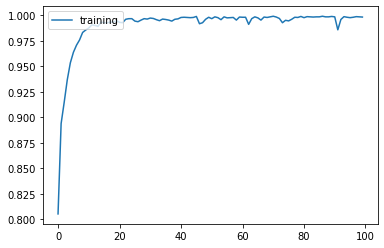

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.legend(['training'], loc = 'upper left')
plt.show()

# KNN

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
accuracy = knn_model.score(X_test,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.85%


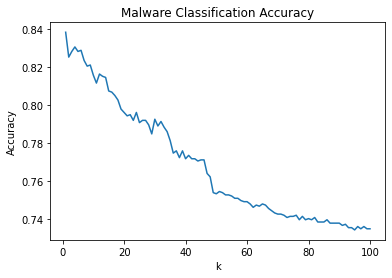

In [23]:
k_list = range(1,101)
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    accuracies.append(classifier.score(X_test,y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Malware Classification Accuracy")
plt.show()

# SVM

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1000)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.81%


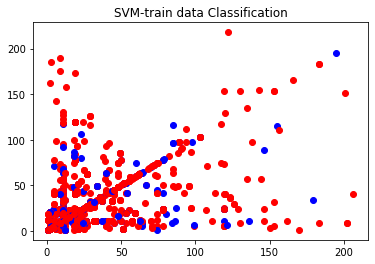

In [21]:
import matplotlib.pyplot as plt
plt.title('SVM-train data Classification')
y_pred = y_pred.astype(float)
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        plt.scatter(X_train[:, 0][i], X_train[:,1][i], color='blue')
    if y_pred[i]==1:
        plt.scatter(X_train[:, 0][i], X_train[:,1][i], color='red')

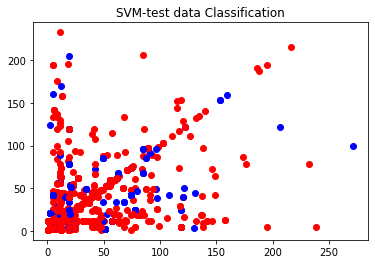

In [22]:
import matplotlib.pyplot as plt
plt.title('SVM-test data Classification')
y_pred = y_pred.astype(float)
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        plt.scatter(X_test[:, 0][i], X_test[:,1][i], color='blue')
    if y_pred[i]==1:
        plt.scatter(X_test[:, 0][i], X_test[:,1][i], color='red')

# xgboost

In [9]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11686 sha256=aff38aaaed07819b448566fffb295f5766ce51dc54cadd3a57d7276670f9901a
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [10]:
import xgboost as xgb
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score

In [11]:
def kFoldValidation(train, features, xgbParams, numRounds, nFolds, target='loss'):#가장 마지막으로 호출됨.
    kf = KFold(n_splits = nFolds, shuffle = True)
    fold_score=[]
    for train_index, test_index in kf.split(train):
        # split train/validation
        x_train, x_valid = train[train_index], train[test_index]
        Y_train, Y_valid = features[train_index], features[test_index]
        dtrain = xgb.DMatrix(x_train, Y_train)
        dvalid = xgb.DMatrix(x_valid, Y_valid)
        watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
        gbm = xgb.train(xgbParams, dtrain, numRounds, evals = watchlist,early_stopping_rounds = 50,verbose_eval=False)#verbose 옵션으로 나타나지 않게함
        score = gbm.best_score
        fold_score.append(score)
    return np.mean(fold_score)

def xgbCv(train, features, numRounds, eta, gamma, maxDepth, minChildWeight, subsample, colSample):
    # prepare xgb parameters
    params = {
        "objective": "reg:linear",
        "booster" : "gbtree",
        "eval_metric": "mae",
        "tree_method": 'auto',
        "silent": 1,
        "eta": eta,
        "max_depth": int(maxDepth),
        "min_child_weight" : minChildWeight,
        "subsample": subsample,
        "colsample_bytree": colSample,
        "gamma": gamma,
        "scale_pos_weight": 0.48
    }
    #순서대로 train 학습시킬 데이터, features 특징, 기준이 될 xgb 파라미터, numRounds 반복횟수, nFolds =
    cvScore = kFoldValidation(train, features, params, int(numRounds), nFolds = 5)
    print("params", params)
    return -1.0 * cvScore

In [12]:
def bayesOpt(train, features):#가장먼저 호출됨.
    ranges = {
        'numRounds': (1000, 2000),
        'eta': (0.03, 0.1),
        'gamma': (0, 10),
        'maxDepth': (4, 10),
        'minChildWeight': (0, 10),
        'subsample': (0, 1),
        'colSample': (0, 1),
        }
    # proxy through a lambda to be able to pass train and features
    optFunc = lambda numRounds, eta, gamma, maxDepth, minChildWeight, subsample, colSample: xgbCv(train, features, numRounds, eta, gamma, maxDepth, minChildWeight, subsample, colSample)
    bo = BayesianOptimization(optFunc, ranges)
    bo.maximize(init_points = 50, n_iter = 5, kappa = 2, acq = "ei", xi = 0.0)
    p = bo.max['params']#가장 좋은 파라미터를 찾아서 p에 넣음.
    print("가장 좋은 파라미터 : ", p)
    return p

In [13]:
max_params = bayesOpt(X_train, y_train) #max_params = 최적의 파라미터

|   iter    |  target   | colSample |    eta    |   gamma   | maxDepth  | minChi... | numRounds | subsample |
-------------------------------------------------------------------------------------------------------------
params {'objective': 'reg:linear', 'booster': 'gbtree', 'eval_metric': 'mae', 'tree_method': 'auto', 'silent': 1, 'eta': 0.07341947077795005, 'max_depth': 5, 'min_child_weight': 7.515330173514709, 'subsample': 0.8770590977556193, 'colsample_bytree': 0.587577693309613, 'gamma': 2.8062529898514788, 'scale_pos_weight': 0.48}
|  1        | -0.2995   |  0.5876   |  0.07342  |  2.806    |  5.803    |  7.515    |  1.733e+0 |  0.8771   |
params {'objective': 'reg:linear', 'booster': 'gbtree', 'eval_metric': 'mae', 'tree_method': 'auto', 'silent': 1, 'eta': 0.040697497813452284, 'max_depth': 7, 'min_child_weight': 8.99432837462906, 'subsample': 0.40993354435291496, 'colsample_bytree': 0.3708195772067795, 'gamma': 5.425037579892994, 'scale_pos_weight': 0.48}
|  2        | -0.3646

In [14]:
dtrain = xgb.DMatrix(X_train, label=y_train)
booster = xgb.train(max_params, dtrain, num_boost_round=1230)

dtest = xgb.DMatrix(X_test)
y_pred = booster.predict(dtest)
y_pred = y_pred > 0.5
y_pred = y_pred.astype(int)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.78%


# 전체 test data 비교

In [26]:
answer=[]
cnn_pred = cnn_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
dtest = xgb.DMatrix(X_test)
xgb_pred = booster.predict(dtest)
for i in range(len(X_test)):
    print(i)
    testing = []
    # CNN
    cnn_pred_test = np.float(cnn_pred[i])
    if cnn_pred_test > 0.5:
        print("CNN : 1")
        testing.append('1')
    else:
        print("CNN : 0")
        testing.append('0')

    # KNN
    knn_pred_test = knn_pred[i]
    if knn_pred_test > 0.5:
        print("KNN : 1")
        testing.append('1')
    else:
        print("KNN : 0")
        testing.append('0')

    # SVM
    svm_pred_test = svm_pred[i]
    if svm_pred_test > 0.5:
        print("SVM : 1")
        testing.append('1')
    else:
        print("SVM : 0")
        testing.append('0')

    # Xgboost
    xgb_pred_test = xgb_pred[0]
    if xgb_pred_test > 0.5:
        print("Xgboost : 1")
        testing.append('1')
    else:
        print("Xgboost : 0")
        testing.append('0')

    if testing.count('1') > testing.count('0'):
        print("This file is Malware")
        answer.append(1)
    else:
        print("This file is Normal")
        answer.append(0)

answer = np.array(answer)
accuracy = accuracy_score(answer, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))    

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
This file is Malware
845
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
846
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
847
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
848
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
849
CNN : 0
KNN : 0
SVM : 0
Xgboost : 1
This file is Normal
850
CNN : 0
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
851
CNN : 1
KNN : 0
SVM : 1
Xgboost : 1
This file is Malware
852
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
853
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
854
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
855
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
856
CNN : 1
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
857
CNN : 1
KNN : 0
SVM : 0
Xgboost : 1
This file is Normal
858
CNN : 0
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
859
CNN : 0
KNN : 1
SVM : 1
Xgboost : 1
This file is Malware
860
CNN : 1
KNN : 1
SVM : 1
Xg